In [1]:
# (auto-reload changes from imported libraries)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer

In [38]:
import networkx as nx

def dfg_to_nx(dfg):
    g = nx.DiGraph()
    for n1, n2 in dfg:
        g.add_edge(n1, n2)
    return g

def nx_to_dfg(g):
    dfg = {}
    for n1, n2 in g.edges():
        dfg[(n1, n2)] = 1
        
    return dfg

In [57]:
import sys

sys.path.append("/Users/wvw/git/pm/compare_logs")
from modules.utils import read_dict

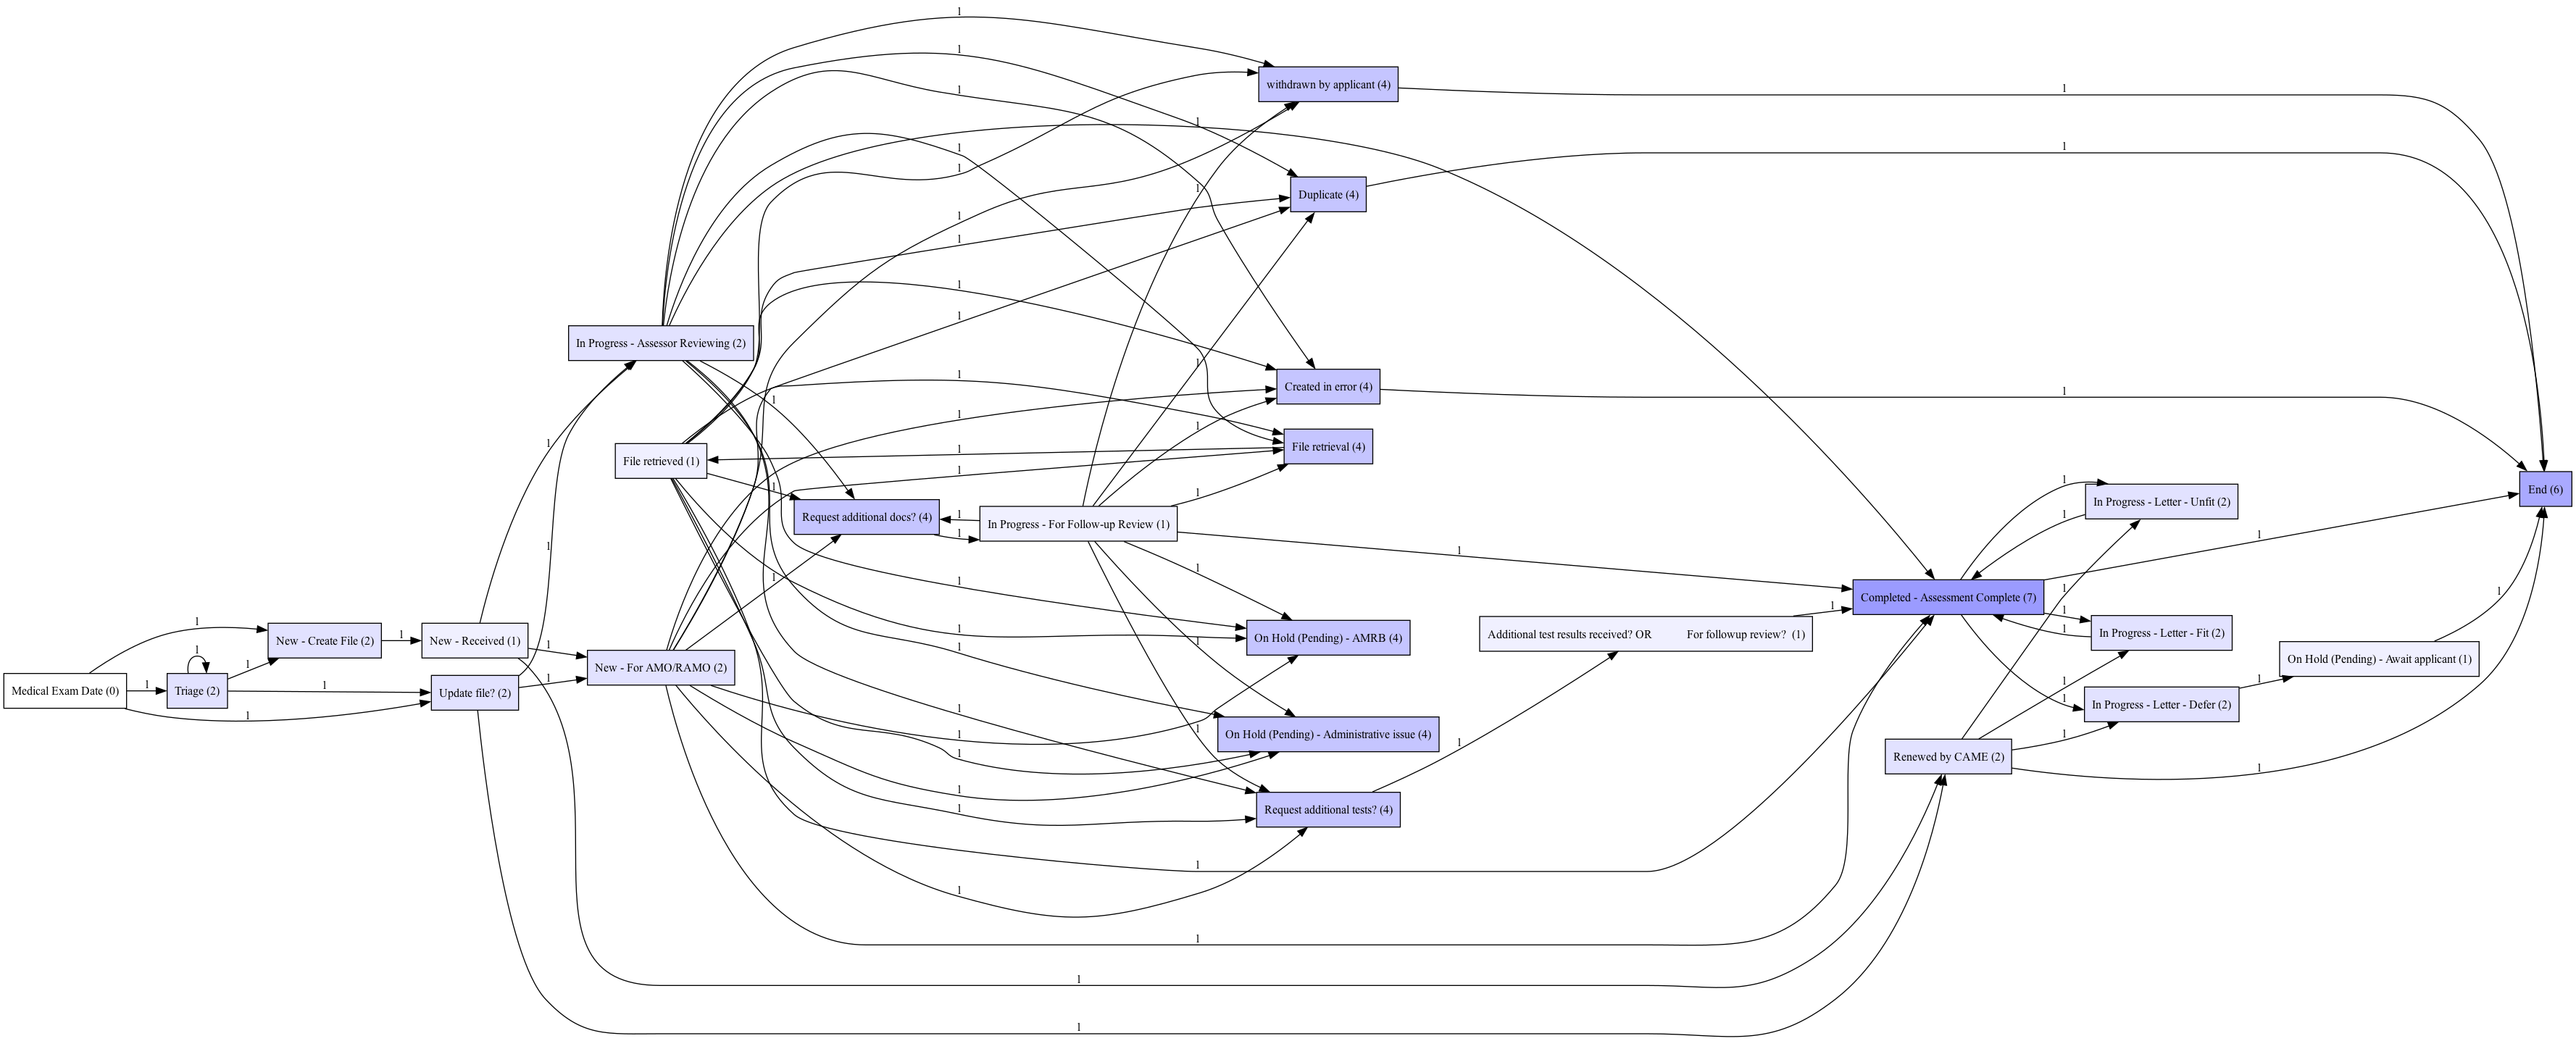

In [71]:
norm_dict = read_dict("./data/tc_medical_cert-normative-align.py")
dfg_visualizer.view(dfg_visualizer.apply(norm_dict))

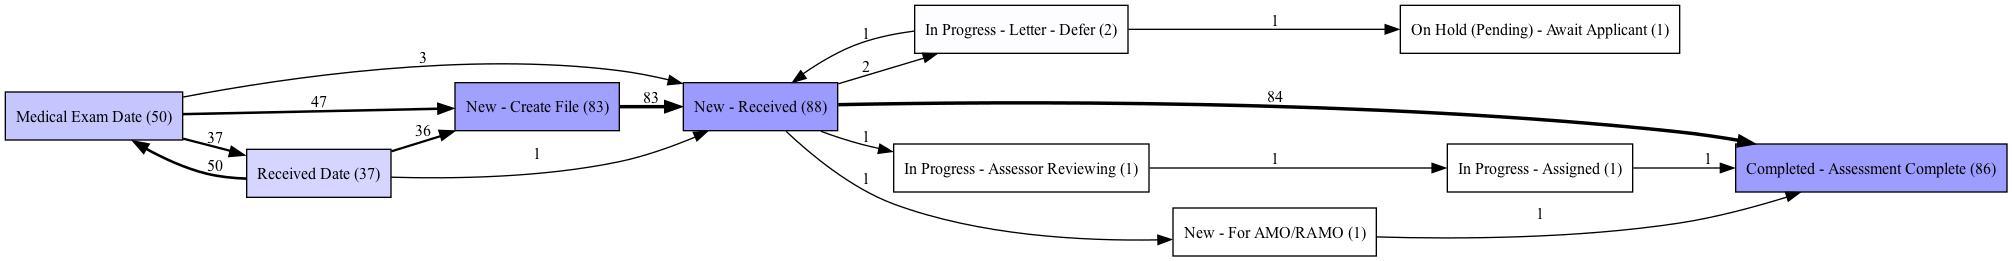

In [74]:
disc_dict = read_dict('./data/Event Dictionaries/PMed_Reallocation_New1_Event Dictionary.py')
dfg_visualizer.view(dfg_visualizer.apply(disc_dict))

In [75]:
norm_g = dfg_to_nx(norm_dict)
disc_g = dfg_to_nx(disc_dict)

# doesn't work well
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(30, 30))
# ax = fig.gca()
# nx.draw_kamada_kawai(norm_g, ax=ax, with_labels=True, node_color='lightgrey', font_color='k', node_size=1500)#, pos=nx.spring_layout(norm_g))

# sanity check
# norm_dict = nx_to_dfg(norm_g)
# dfg_visualizer.view(dfg_visualizer.apply(norm_dict))

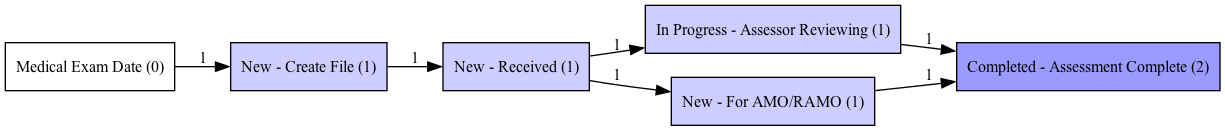

In [76]:
from modules.graph import max_common_subgraph

mcs_g = max_common_subgraph(norm_g, disc_g)

mcs_dict = nx_to_dfg(mcs_g)
# crickey ...
dfg_visualizer.view(dfg_visualizer.apply(mcs_dict))

In [ ]:
# TODO
# could highlight MCS in DFG; non-compliant parts in grey or whatever